# Testing hypothesis and alternate hypothesis for running data.

## Null Hypothesis

#### H0 (Age): Age does not significantly affect race pace (MPH) 
#### H0 (Gender): Gender does not significantly affect race pace (MPH)
#### H0 (Elevation): Average State elevation does not significantly affect race pace (MPH)

## Alternate Hypothesis

#### H1 (Age): Age significantly affects race pace (MPH)
#### H1 (Gender): Gender significantly affects race pace (MPH)
#### H1 (Elevation): Average State elevation does significantly affect race pace (MPH)

### For elevation and race pace, real age and race pace I am using linear regression analysis.  It is suitable for examining a these variables due to real age, race pace, and elevation being continuous variables.

### For gender and race pace I will use an independent T-test (WELCH'S t-test).  It is appropriate for comparing the means of two independent groups to see if there is a significant difference in their race pace for gender.

## I am setting the alpha to 0.05 as a common significance level.  This should ensure my help if any values have a risk of concluding that a differnce exists when there is no actual difference.

In [54]:
import pandas as pd
import statsmodels.api as sm
from patsy import dmatrices
from scipy.stats import ttest_ind
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
fifty_um_data = pd.read_csv('../Data/top_50_50km.csv')

In [3]:
fifty_um_data.head()

,Unnamed: 0,Year of event,Event name,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,...,Highest Elevation (feet),Elevation Gain (feet),Average state elevation (feet),Distance (miles),Hours Ran,mph,state_code,datetime,latitude,longitude
0,0,2018,Chuckanut 50K (USA),410,3:36:35,"*Folsom, CA",USA,1991,M,23,...,1870.0,5000.0,1700.0,31.0,3.609722,8.587918,WA,2018-03-17,48.7033,-122.4786
1,1,2018,Chuckanut 50K (USA),410,3:40:57,"*Santa Fe, NM",USA,1986,M,23,...,1870.0,5000.0,1700.0,31.0,3.682500,8.418194,WA,2018-03-17,48.7033,-122.4786
2,2,2018,Chuckanut 50K (USA),410,3:47:43,"*San Francisco, CA",IRL,1987,M,23,...,1870.0,5000.0,1700.0,31.0,3.795278,8.168045,WA,2018-03-17,48.7033,-122.4786
3,3,2018,Chuckanut 50K (USA),410,3:48:13,"*Ashland, OR",USA,1988,M,23,...,1870.0,5000.0,1700.0,31.0,3.803611,8.150150,WA,2018-03-17,48.7033,-122.4786
4,4,2018,Chuckanut 50K (USA),410,3:50:55,"*Bend, OR",USA,1981,M,35,...,1870.0,5000.0,1700.0,31.0,3.848611,8.054854,WA,2018-03-17,48.7033,-122.4786


In [4]:
# Changing gender to Males = 1 and Females = 0

fifty_um_data['Athlete gender'] = fifty_um_data['Athlete gender'].map({'F': 0, 'M': 1})

In [5]:
# Change U23 age category to a numerical value of 18. Can mean anyone from age 0 to 22.

fifty_um_data['Athlete age category'] = fifty_um_data['Athlete age category'].replace('U23', '18')

In [6]:
# Rename categories to fit with the R script
fifty_um_data.rename(columns={'Athlete age category': "Age_category"}, inplace=True)

In [7]:
fifty_um_data.rename(columns={'Athlete gender': "Gender"}, inplace=True)
fifty_um_data.rename(columns={'Average state elevation (feet)': "State_elevation"}, inplace=True)
fifty_um_data.rename(columns={'true age': "true_age"}, inplace=True)

In [8]:
# I switched from age category to true age.  There are no children 7 or under that run these races.  There are a couple instances where 8
# year olds did run a 50km
fifty_um_data = fifty_um_data[fifty_um_data['true_age'] > 2]

In [9]:
# Welch's t-test against males and females to race pace.
females = fifty_um_data[fifty_um_data['Gender'] == 0]['mph']
males = fifty_um_data[fifty_um_data['Gender'] == 1]['mph']
t_stat, p_value = ttest_ind(females, males, equal_var=False)
print(f't-statistic: {t_stat}, p-value: {p_value}')

t-statistic: -94.83475423075245, p-value: 0.0


In [39]:
# Linear regression analysis against age, state elevation, and gender against race pace.
# Adding a constant ensures that the regression line is not forced through the origin.
# The constant represents the expected value of the dependent varialbe when all predictors are at their reference levels.

X = fifty_um_data[['Gender', 'true_age', 'State_elevation']]


In [40]:
y= fifty_um_data['mph']

In [46]:
model = sm.OLS(y, X).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                    mph   R-squared (uncentered):                   0.898
Model:                            OLS   Adj. R-squared (uncentered):              0.898
Method:                 Least Squares   F-statistic:                          5.558e+05
Date:                Tue, 03 Dec 2024   Prob (F-statistic):                        0.00
Time:                        11:27:26   Log-Likelihood:                     -3.5856e+05
No. Observations:              189535   AIC:                                  7.171e+05
Df Residuals:                  189532   BIC:                                  7.172e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [ ]:
# We have good data, now we can create our test.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [42]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression()

In [43]:
y_pred = lin_model.predict(X_test)

In [45]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(mse)
print(r2)

1.0103978462719565
0.0924335291568712


In [44]:
lin_model.predict([[0, 32, 5000]])

/Users/idsg/anaconda3/envs/DAI/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([4.53634114])

In [52]:
# I'm making a residuals plot to see if it's hetero or homostedastic

residuals = y_test - y_pred

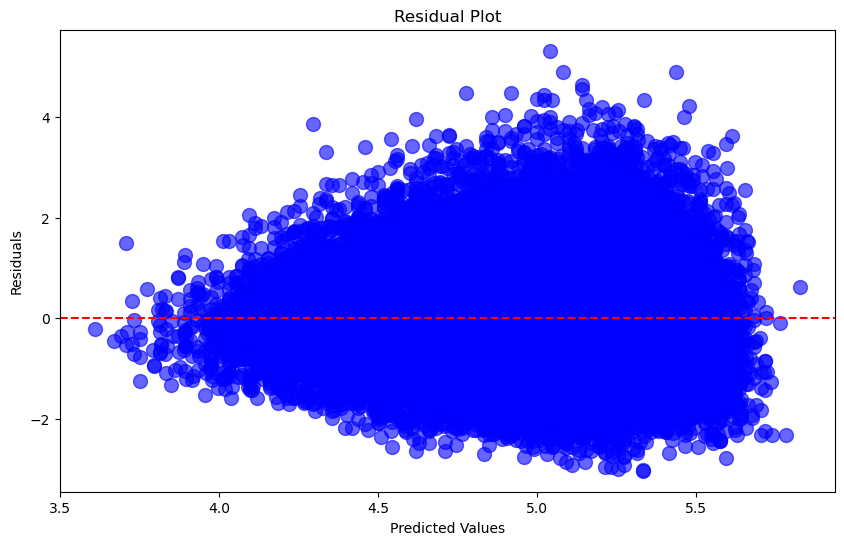

In [53]:
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue', s=100, alpha=0.6)
plt.axhline(y=0, color='red', linestyle="--")
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

Possibly attempt to do a log transformation?

make fifty_um_df['log_mph'] = np.log(fifty_um_df['mph])

make log_mph my Y variable.

Attempt to stabalize the Variance

In [55]:
fifty_um_data['log_mph'] = np.log(fifty_um_data['mph'])

In [58]:
y1 = fifty_um_data['log_mph']

In [59]:
log_X_train, log_X_test, log_y_train, log_y_test = train_test_split(X, y1, test_size=0.2)

In [61]:
log_lin_model = LinearRegression()
log_lin_model.fit(log_X_train, log_y_train)

LinearRegression()

In [62]:
log_y_pred = log_lin_model.predict(log_X_test)

In [63]:
residuals_log = log_y_test - log_y_pred

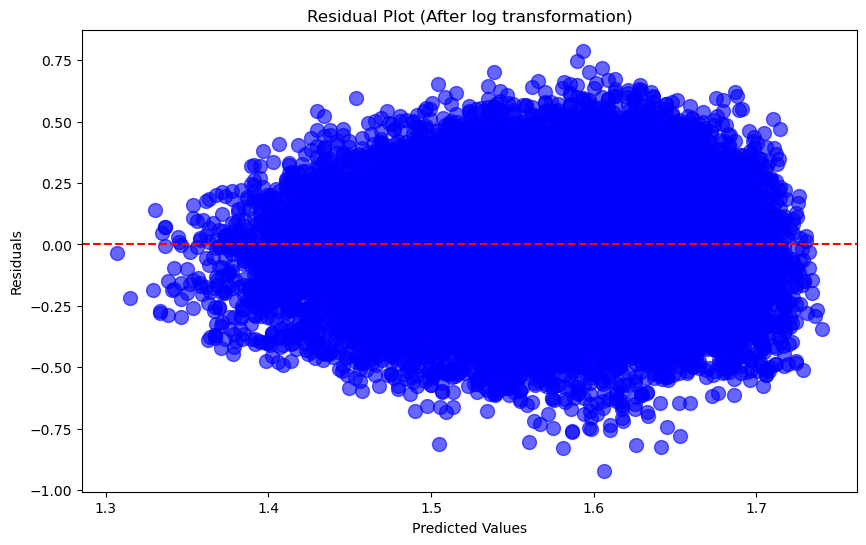

In [64]:
plt.figure(figsize=(10,6))
plt.scatter(log_y_pred, residuals_log, color='blue', s=100, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot (After log transformation)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

### Based off the data above.  We have switched from using age_category to true_age.  Age_category had values that would have us fail to reject the null hypothesis.  When we run the data with real age of athletes we can reject the null hypothesis.  For age, gender, and state elevation we can reject the null hypothesis for each.

#### Age, Gender, and Elevation significantly affect race pace.

### I am not going to do linear regression analysis and prediction models.

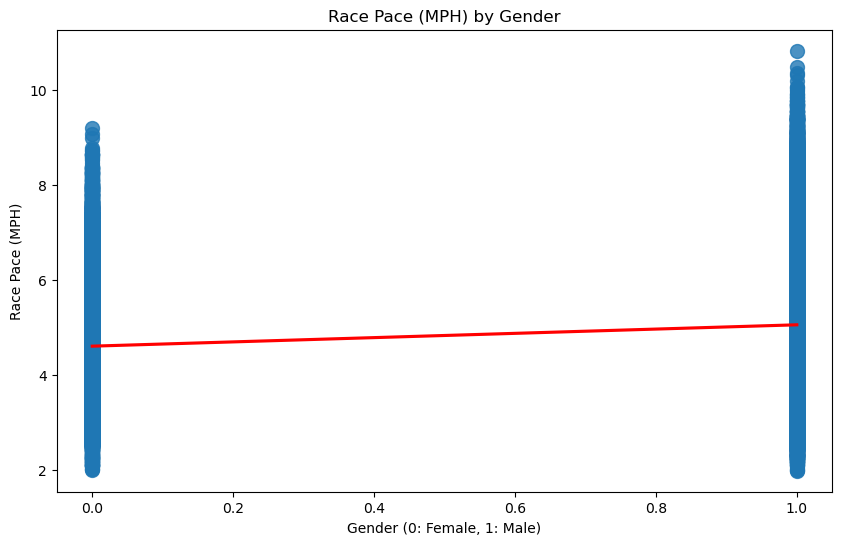

In [14]:
# plot gender vs mph

plt.figure(figsize=(10, 6))
sns.regplot(x='Gender', y='mph', data=fifty_um_data, scatter_kws={'s': 100}, line_kws={'color': 'red'})
plt.title('Race Pace (MPH) by Gender')
plt.xlabel('Gender (0: Female, 1: Male)')
plt.ylabel('Race Pace (MPH)')
plt.show()

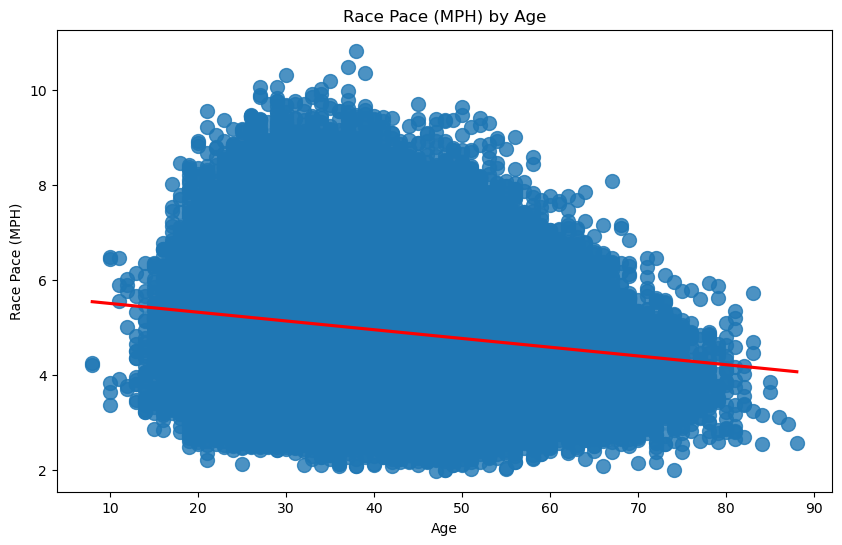

In [15]:
# plot Age vs mph

plt.figure(figsize=(10, 6))
sns.regplot(x='true_age', y='mph', data=fifty_um_data, scatter_kws={'s': 100}, line_kws={'color': 'red'})
plt.title('Race Pace (MPH) by Age')
plt.xlabel('Age')
plt.ylabel('Race Pace (MPH)')
plt.show()

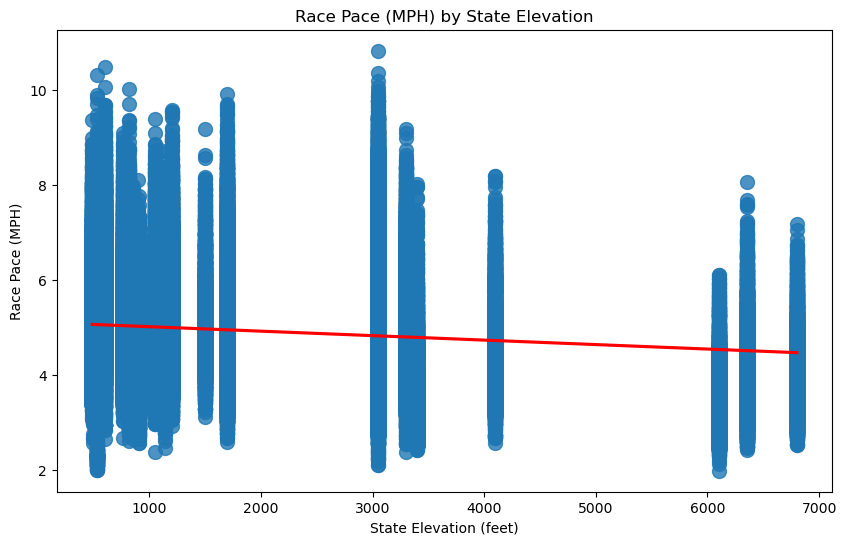

In [16]:
# plot state elevation vs mph

plt.figure(figsize=(10, 6))
sns.regplot(x='State_elevation', y='mph', data=fifty_um_data, scatter_kws={'s': 100}, line_kws={'color': 'red'})
plt.title('Race Pace (MPH) by State Elevation')
plt.xlabel('State Elevation (feet)')
plt.ylabel('Race Pace (MPH)')
plt.show()

I want to create a quadratic regression so the lines fit the plots.


In [69]:
fifty_um_data['true_age_squared'] = fifty_um_data['true_age'] ** 2
fifty_um_data['state_elevation_squared'] = fifty_um_data['State_elevation'] ** 2

In [70]:
X_squared = fifty_um_data[['Gender', 'true_age', 'true_age_squared', 'State_elevation', 'state_elevation_squared']]
y = fifty_um_data['mph']

In [72]:
X_train_square, X_test_square, y_train_square, y_test_square = train_test_split(X_squared, y, test_size=0.2)

In [73]:
quad_model = LinearRegression()
quad_model.fit(X_train_square, y_train_square)

LinearRegression()

In [74]:
y_pred_square = quad_model.predict(X_test_square)

In [75]:
mse_square = mean_squared_error(y_test_square, y_pred_square)
r2_square = r2_score(y_test_square, y_pred_square)
print(mse_square, r2_square)

0.9624358054355837 0.13830084245734475


In [85]:
true_age_range = np.linspace(X_squared['true_age'].min(), X_squared['true_age'].max(), 100)
true_age_squared_range = true_age_range ** 2


In [86]:
gender = 0
state_elevation = X_squared['State_elevation'].mean()
state_elevation_squared = state_elevation ** 2

In [87]:
plot_data = pd.DataFrame({
    'Gender': [gender] * len(true_age_range),
    'true_age': true_age_range,
    'true_age_squared': true_age_squared_range,
    'State_elevation': [state_elevation] * len(true_age_range),
    'state_elevation_squared': [state_elevation_squared] * len(true_age_range)
})

In [88]:
y_plot_pred = quad_model.predict(plot_data)

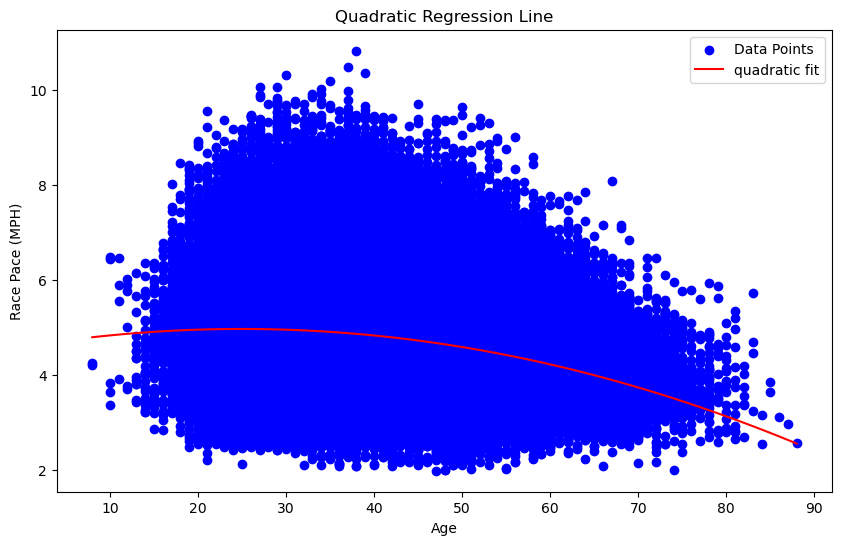

In [89]:
plt.figure(figsize=(10,6))
plt.scatter(X_squared['true_age'], y, color='blue', label='Data Points')
plt.plot(true_age_range, y_plot_pred, color='red', label = 'quadratic fit')
plt.title('Quadratic Regression Line')
plt.xlabel('Age')
plt.ylabel('Race Pace (MPH)')
plt.legend()
plt.show()

In [90]:
state_elevation_range = np.linspace(X_squared['State_elevation'].min(), X_squared['State_elevation'].max(), 100)
state_elevation_squared_range = state_elevation_range ** 2

In [91]:
gender1 = 0
true_age = X_squared['true_age'].mean()
true_age_squared = true_age ** 2

In [92]:
plot_data2 = pd.DataFrame({
    'Gender': [gender1] * len(state_elevation_range),
    'true_age': [true_age] * len(state_elevation_range),
    'true_age_squared': [true_age_squared] * len(state_elevation_range),
    'State_elevation': state_elevation_range,
    'state_elevation_squared': state_elevation_squared_range
})

In [93]:
y_plot2_pred = quad_model.predict(plot_data2)

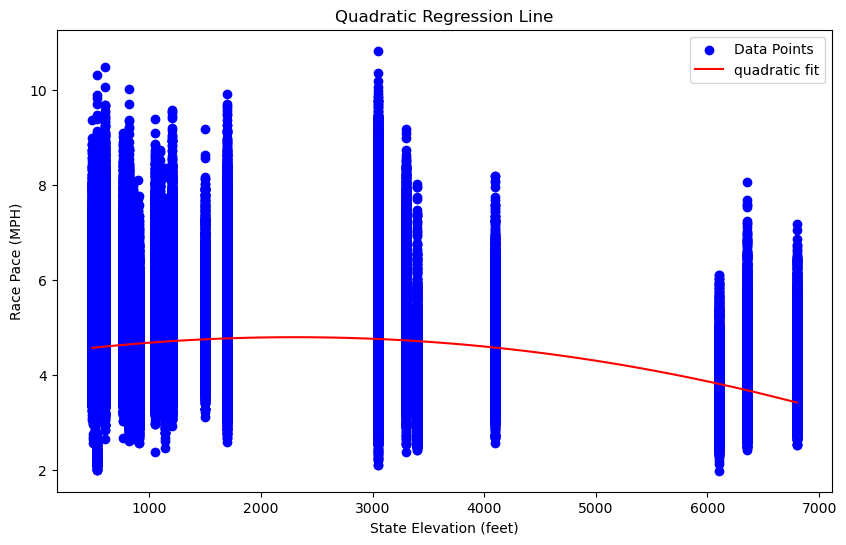

In [94]:
plt.figure(figsize=(10,6))
plt.scatter(X_squared['State_elevation'], y, color='blue', label='Data Points')
plt.plot(state_elevation_range, y_plot2_pred, color='red', label = 'quadratic fit')
plt.title('Quadratic Regression Line')
plt.xlabel('State Elevation (feet)')
plt.ylabel('Race Pace (MPH)')
plt.legend()
plt.show()

#### Now I will create my predictive plot.

In [48]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [66]:
log_results = pd.DataFrame({'Log_actual': log_y_test, 'Log_predicted': log_y_pred})

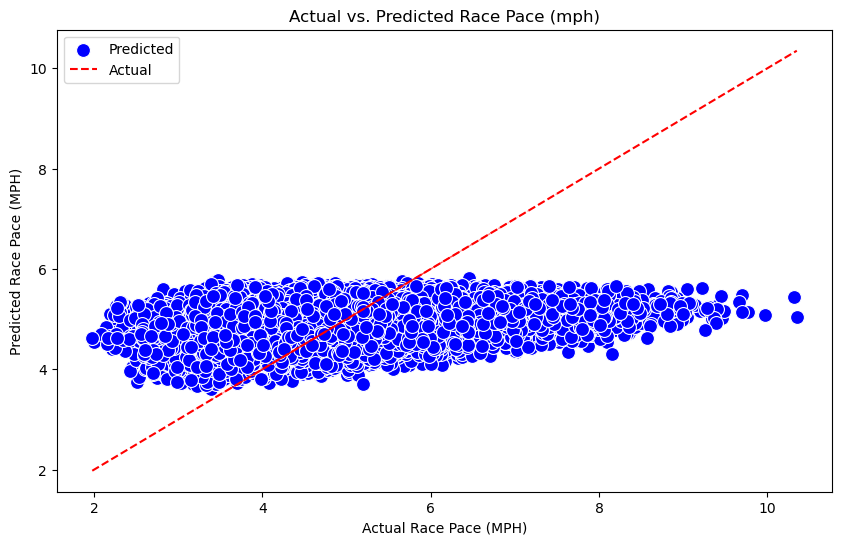

In [49]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Actual', y='Predicted', data=results, color='blue', s=100, label='Predicted')
sns.lineplot(x='Actual', y='Actual', data=results, color='red', label='Actual', linestyle="--")
plt.title('Actual vs. Predicted Race Pace (mph)')
plt.xlabel('Actual Race Pace (MPH)')
plt.ylabel('Predicted Race Pace (MPH)')
plt.legend()
plt.show()

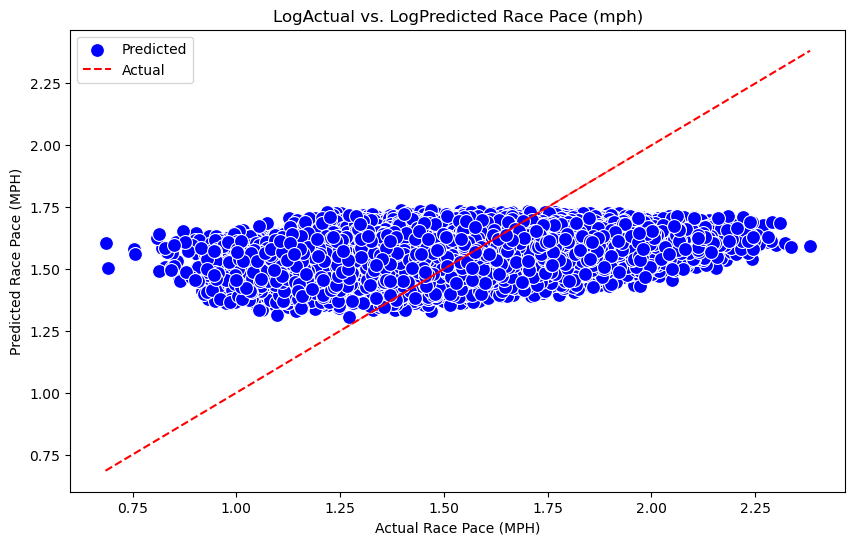

In [68]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Log_actual', y='Log_predicted', data=log_results, color='blue', s=100, label='Predicted')
sns.lineplot(x='Log_actual', y='Log_actual', data=log_results, color='red', label='Actual', linestyle="--")
plt.title('LogActual vs. LogPredicted Race Pace (mph)')
plt.xlabel('Actual Race Pace (MPH)')
plt.ylabel('Predicted Race Pace (MPH)')
plt.legend()
plt.show()